In [24]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# %matplotlib inline

# Дискретные модели

## Экспоненциальная модель

In [25]:
def exp_model(x0, r, n):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    
    trace = [x0]
    f = lambda x: r*x
    for i in range(n-1):
        trace.append(f(trace[-1]))
    ax[0].plot(trace)
    ax[0].set_ylim(0, 2)
    ax[0].set_xlabel('n')
    ax[0].set_ylabel('x')

    xx = np.linspace(0, 1, 10)
    yy = f(xx)
    ax[1].plot(xx, yy)
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, 1)
    ax[1].plot((0, 1), linestyle='--')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('f(x)')

x0_slider = widgets.FloatSlider(0.5, min=0, max=1, step=0.1)
r_slider = widgets.FloatSlider(1, min=0, max=2, step=0.1)
widgets.interact(exp_model, x0=x0_slider, r=r_slider, n=widgets.fixed(100))

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=1.0, description='r…

<function __main__.exp_model(x0, r, n)>

## Логистическая модель

In [26]:
def logistic_model(x0, r, n):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    
    trace = [x0]
    f = lambda x: r*x*(1-x)
    for i in range(n-1):
        trace.append(f(trace[-1]))
    ax[0].plot(trace)
    ax[0].set_ylim(0, 2)
    ax[0].set_xlabel('n')
    ax[0].set_ylabel('x')

    xx = np.linspace(0, 1, 10)
    yy = f(xx)
    ax[1].plot(xx, yy)
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, 1)
    ax[1].plot((0, 1), linestyle='--')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('f(x)')

    plt.show()

x0_slider = widgets.FloatSlider(0.5, min=0, max=1, step=0.1)
r_slider = widgets.FloatSlider(1, min=0, max=4, step=0.1)
widgets.interact(logistic_model, x0=x0_slider, r=r_slider, n=widgets.fixed(100))

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=1.0, description='r…

<function __main__.logistic_model(x0, r, n)>

Text(0, 0.5, 'x tail')

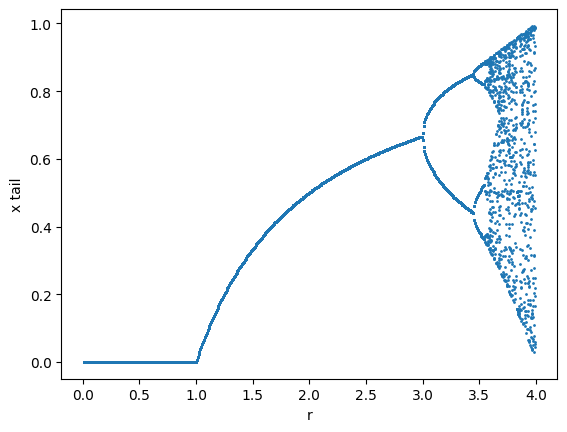

In [27]:
r_space = np.linspace(0.01, 3.99, 500)
n = 1000
k = 20
x0 = 0.5
tails = []
for r in r_space:
    f = lambda x: r*x*(1-x)
    trace = [x0]
    for i in range(n-1):
        trace.append(f(trace[-1]))
    tail = trace[-k:]
    tails.append(tail)

fig, ax = plt.subplots()
xx = [r for r in r_space for i in range(k)]
yy = [t for tail in tails for t in tail]
ax.scatter(xx, yy, s=1)
ax.set_xlabel('r')
ax.set_ylabel('x tail')

In [28]:
def period(r):
    fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(16, 8))
    ax = ax.flatten()
    f = lambda x: r*x*(1-x)
    for i in range(len(ax)):
        xx = np.linspace(0, 1, 1000)
        yy = xx
        k = i+1
        for _ in range(k):
            yy = f(yy)
            
        ax[i].plot(xx, yy)
        ax[i].set_xlim(0, 1)
        ax[i].set_ylim(0, 1)
        ax[i].plot((0, 1), linestyle='--')
        ax[i].set_xlabel('x')
        ax[i].set_ylabel(f'f(x)')
        ax[i].set_title(f'Период k={k}')
r_slider = widgets.FloatSlider(1, min=0, max=4, step=0.1)
widgets.interact(period, r=r_slider)

interactive(children=(FloatSlider(value=1.0, description='r', max=4.0), Output()), _dom_classes=('widget-inter…

<function __main__.period(r)>

## Модель Морана

In [29]:
def moran_model(x0, r, n):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    
    trace = [x0]
    f = lambda x: x*np.exp(r*(1-x))
    for i in range(n-1):
        trace.append(f(trace[-1]))
    ax[0].plot(trace)
    ax[0].set_ylim(0, 5)
    ax[0].set_xlabel('n')
    ax[0].set_ylabel('x')

    xx = np.linspace(0, 5, 50)
    yy = f(xx)
    ax[1].plot(xx, yy)
    ax[1].set_xlim(0, 5)
    ax[1].set_ylim(0, 5)
    ax[1].plot((0, 5), (0, 5), linestyle='--')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('f(x)')

    plt.show()

x0_slider = widgets.FloatSlider(0.5, min=0, max=5, step=0.1)
r_slider = widgets.FloatSlider(1, min=0, max=4, step=0.1)
widgets.interact(moran_model, x0=x0_slider, r=r_slider, n=widgets.fixed(100))

interactive(children=(FloatSlider(value=0.5, description='x0', max=5.0), FloatSlider(value=1.0, description='r…

<function __main__.moran_model(x0, r, n)>

## Модель Хозяин-Паразит

In [30]:
def host_parasit(x0, y0, a, b, c, n):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
    ax = ax.flatten()
    
    trace_x = [x0]
    trace_y = [y0]
    f_x = lambda x, y: b*x*np.exp(-a*y)
    f_y = lambda x, y: c*x*(1-np.exp(-a*y))
    for i in range(n-1):
        x = trace_x[-1]
        y = trace_y[-1]
        trace_x.append(f_x(x, y))
        trace_y.append(f_y(x, y))
    ax[0].plot(trace_x)
    ax[0].plot(trace_y)
    ax[0].set_ylim(0, 5)
    ax[0].set_xlabel('n')
    ax[0].set_ylabel('x, y')
    
    # xx = np.linspace(0, 5, 50)
    # yy = f_x(xx)
    ax[1].plot(trace_x, trace_y)
    ax[1].plot(x0, y0, marker='o')
    # ax[1].set_xlim(0, 5)
    # ax[1].set_ylim(0, 5)
    # ax[1].plot((0, 5), (0, 5), linestyle='--')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')

    xx = np.linspace(0, 5)
    yy = b*np.exp(-a*xx)
    x_edge = np.log(b) / a # граничное ратьчисло паразитов, после которого хозяины начинают выми
    ax[0].plot((0, 100), (x_edge, x_edge), linestyle='--')
    ax[1].plot((0.5, 2.5), (x_edge, x_edge), linestyle='--')
    ax[2].plot(xx, yy)
    ax[2].plot((0, 5), (1, 1), linestyle='--')
    ax[2].plot((x_edge, x_edge), (0, 1), linestyle='--')
    ax[2].set_xlabel('y')
    ax[2].set_ylabel('b*exp(-a*y)')

    ax[3].set_visible(False)
    plt.show()

x0_slider = widgets.FloatSlider(1.2, min=0, max=5, step=0.1)
y0_slider = widgets.FloatSlider(0.5, min=0, max=5, step=0.1)
a_slider = widgets.FloatSlider(0.2, min=0, max=5, step=0.1)
b_slider = widgets.FloatSlider(1.1, min=1, max=5, step=0.1)
c_slider = widgets.FloatSlider(4, min=0, max=5, step=0.1)

widgets.interact(host_parasit, x0=x0_slider, y0=y0_slider, a=a_slider, b=b_slider, c=c_slider, n=widgets.fixed(100))

interactive(children=(FloatSlider(value=1.2, description='x0', max=5.0), FloatSlider(value=0.5, description='y…

<function __main__.host_parasit(x0, y0, a, b, c, n)>

## Модель Беддингтона

In [31]:
def beddington_model(x0, y0, r, q, n):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    ax = ax.flatten()
    
    trace_x = [x0]
    trace_y = [y0]
    alpha = r*(1-q)
    gamma = 1 / (1 - np.exp(-alpha))
    f_x = lambda x, y: x*np.exp(r*(1-q*x) - alpha*y)
    f_y = lambda x, y: gamma*x*(1 - np.exp(-alpha*y))
    for i in range(n-1):
        x = trace_x[-1]
        y = trace_y[-1]
        trace_x.append(f_x(x, y))
        trace_y.append(f_y(x, y))
    ax[0].plot(trace_x)
    ax[0].plot(trace_y)
    ax[0].set_ylim(0, 5)
    ax[0].set_xlabel('n')
    ax[0].set_ylabel('x, y')
    
    ax[1].plot(trace_x, trace_y)
    ax[1].plot(x0, y0, marker='o')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')

    plt.show()

x0_slider = widgets.FloatSlider(1.2, min=0, max=5, step=0.1)
y0_slider = widgets.FloatSlider(0.5, min=0, max=5, step=0.1)
r_slider = widgets.FloatSlider(0.2, min=0, max=5, step=0.1)
q_slider = widgets.FloatSlider(1.1, min=1, max=5, step=0.1)

widgets.interact(beddington_model, x0=x0_slider, y0=y0_slider, r=r_slider, q=q_slider, n=widgets.fixed(100))

interactive(children=(FloatSlider(value=1.2, description='x0', max=5.0), FloatSlider(value=0.5, description='y…

<function __main__.beddington_model(x0, y0, r, q, n)>

## Хаос

In [32]:
def trace_shift(x0, eps, f, n):
    fig, ax = plt.subplots(ncols=1, figsize=(12, 6))
    # ax = ax.flatten()
    ax = [ax]
    
    trace = [x0]
    trace_shifted = [x0 + eps]
    # f = lambda x: 1 - np.abs(2*x - 1)
    # f = lambda x: 4*x*(1-x)
    # f = lambda x: 2*x*(1-x)
    for i in range(n-1):
        trace.append(f(trace[-1]))
        trace_shifted.append(f(trace_shifted[-1]))
        
    ax[0].plot(trace)
    ax[0].plot(trace_shifted)
    ax[0].set_ylim(-2, 2)
    ax[0].set_xlabel('n')
    ax[0].set_ylabel('x')

    # xx = np.linspace(0.01, 0.99, 101)
    # yy = f(xx)
    # ax[1].plot(xx, yy)
    # ax[1].plot((0, 1), (0, 1), linestyle='--')
    # plt.show()

x0_slider = widgets.FloatSlider(0.51, min=0, max=1, step=0.01)
# eps_slider = widgets.FloatLogSlider(value=0, min=-12, max=0, step=1)
eps_slider = widgets.Select(options=[0, 1e-1, 1e-6, 1e-12])
f_slider = widgets.Select(options={
    'logistic_die': lambda x: 0.9*x*(1-x),
    'logistic_stable': lambda x: 2*x*(1-x),
    'logitstic_period2': lambda x: 3.1*x*(1-x),
    'logitstic_chaos': lambda x: 4*x*(1-x),
    'saw_chaos': lambda x: 1 - np.abs(2*x - 1),
})

widgets.interact(trace_shift, x0=x0_slider, eps=eps_slider, f=f_slider, n=widgets.fixed(100))

interactive(children=(FloatSlider(value=0.51, description='x0', max=1.0, step=0.01), Select(description='eps',…

<function __main__.trace_shift(x0, eps, f, n)>

# Непрерывные модели

## Непрерывная логистическая модель (уже нет хаоса)

In [33]:
def logistic_continius_model(x0, r, c, n, dt):
    fig, ax = plt.subplots(ncols=1, figsize=(12, 6))
    ax = [ax]
    
    f = lambda x: r*x*(1-x) - c
    trace = [x0]
    for i in range(n-1):
        x = trace[-1]
        dx = f(x) * dt
        trace.append(np.clip(x + dx, 0, 1e6))
    
    ax[0].plot(np.arange(0, n*dt, dt), trace)
    ax[0].set_ylim(-0.1, 2)
    ax[0].set_xlabel('n')
    ax[0].set_ylabel('x')

    plt.show()

x0_slider = widgets.FloatSlider(0.5, min=0, max=2, step=0.1)
r_slider = widgets.FloatSlider(1, min=0, max=4, step=0.1)
c_slider = widgets.FloatSlider(0.25, min=0, max=0.5, step=0.05)

widgets.interact(logistic_continius_model, x0=x0_slider, r=r_slider, c=c_slider, n=widgets.fixed(50_000), dt=widgets.fixed(1e-3))

interactive(children=(FloatSlider(value=0.5, description='x0', max=2.0), FloatSlider(value=1.0, description='r…

<function __main__.logistic_continius_model(x0, r, c, n, dt)>

## Бифуркация Анлронова-Хопфа

In [34]:
x0 = 0.1
y0 = 0.1
mu = 0
omega = 0.1
b = 0.1
n = 50_000
dt = 0.01

mu_slider = widgets.FloatSlider(value=mu, min=-1, max=1)
# omega_slider = widgets.FloatSlider(value=omega, min=-1, max=1)
# b_slider = widgets.FloatSlider(value=b, min=-1, max=1)

@widgets.interact(
    mu=mu_slider,
    omega=widgets.fixed(omega),
    b=widgets.fixed(b),
)
def andron_hopf(mu, omega, b):
    fig, ax = plt.subplots(ncols=3, figsize=(16, 6))
    # ax = [ax]
    
    trace = [np.array([x0, y0])]
    def f(x, y):
        return np.array([
            mu*x - omega*y - (x**2 + y**2)*(x + b*y),
            omega*x + mu*y - (x**2 + y**2)*(y - omega*x)
        ])
    for i in range(n-1):
        trace.append(trace[-1] + f(*trace[-1]) * dt)
    trace = np.array(trace)
    
    ax[0].plot(np.arange(0, n*dt, dt), trace)
    ax[0].set_ylim(-1, 1)
    ax[0].set_xlabel('n')
    ax[0].set_ylabel('x')

    ax[1].plot(trace[:, 0], trace[:, 1])
    ax[1].plot(x0, y0, marker='o')
    ax[1].set_xlim(-1, 1)
    ax[1].set_ylim(-1, 1)
    
    x_mesh, y_mesh = np.meshgrid(np.linspace(-1, 1, 10), 
                   np.linspace(-1, 1, 10))
    u, v = f(x_mesh, y_mesh)
    ax[2].streamplot(x_mesh, y_mesh, u, v, density=1.4)

interactive(children=(FloatSlider(value=0.0, description='mu', max=1.0, min=-1.0), Output()), _dom_classes=('w…

## Странный аттрактор

In [35]:
x0 = 0.01
y0 = 0.01
z0 = 0
sigma = 10
r = 28
b = 8/3
dt = 0.01
eps = np.array([1e-6, 0, 0])

speed_slider = widgets.IntSlider(value=10, min=1, max=30)
n_play = widgets.Play(min=1, max=10_000, step=15)

def change_speed(*args):
    n_play.step = speed_slider.value
    
n_play.observe(change_speed, 'value')

@widgets.interact(
    speed=speed_slider,
    n=n_play,
)
def lorenz(speed, n):
    trace = [np.array([x0, y0, z0])]
    trace_shifted = [np.array([x0, y0, z0]) + eps]
    def f(x, y, z):
        return np.array([
            sigma*(y-x),
            r*x - y - x*z,
            x*y - b*z,
        ])
    for i in range(n-1):
        trace.append(trace[-1] + f(*trace[-1]) * dt)
        trace_shifted.append(trace_shifted[-1] + f(*trace_shifted[-1]) * dt)
    trace = np.array(trace)
    trace_shifted = np.array(trace_shifted)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot3D(trace[:, 0], trace[:, 1], trace[:, 2])
    ax.plot3D(trace_shifted[:, 0], trace_shifted[:, 1], trace_shifted[:, 2])
    ax.set_xlim((-20, 20))
    ax.set_ylim((-20, 20))
    ax.set_zlim((0, 60))

interactive(children=(IntSlider(value=10, description='speed', max=30, min=1), Play(value=1, description='n', …